Os dados do arquivo Brain, em anexo, referem-se ao peso do cérebro (g), tamanho da cabeça (cm3) de 237 adultos, identificados por sexo e grupo etário. O estudo teve por objetivo verificar se:

* ***1) Há diferença no peso cerebral entre os sexos? E entre os grupos etários?***

* ***2) O tamanho da cabeça é preditor do peso cerebral e, neste caso, há diferença nessa relação entre os sexos e entre os grupos etários?***

* ***3) Estime o peso médio do cérebro de homens e de mulheres (pontual e intervalar).***

Interprete seus resultados e verifique se as suposições dos métodos são adequadas a estes dados.

Se uma das suas respostas (aos itens 1, 2 ou 3) aplicar, além da estatística clássica, também a inferencial (de maneira adequada, claro), sua nota será acrescida de 1 ponto (ou seja, sua prova fica valendo 11 pontos).

O formato de entrega será de dois arquivos: 

**1 PDF, com os resultados resumidos e comentados
e outro em Jupyter Notebook, com os códigos usados para a obtenção dos resultados. Este notebook, deve ser comentado de forma a facilmente identificar os códigos de cada análise.**

# Importando as bibliotecas

In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statistics import mean, pstdev, stdev
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro
import statsmodels.stats.api as sms

# Lendo e analisando de maneira bem básica os dados

In [2]:
# Dados de entrada
df = pd.read_csv("Brain.csv", sep = ',', na_values = '-', encoding= 'unicode_escape')
df['Desc_Homem'] = ['Homem' if x ==1 else 'Mulher' for x in df['Homem']] 
df['Desc_Idade'] = ['Acima de 45' if x ==1 else 'Abaixo de 45' for x in df['Acima45']]
df["Homem_Acima45_Concat"] = df["Desc_Homem"] + " e " + df["Desc_Idade"].astype(str)
df.head(5)

,Homem,Acima45,Tamanho,Peso,Desc_Homem,Desc_Idade,Homem_Acima45_Concat
0,1,0,4512,1530,Homem,Abaixo de 45,Homem e Abaixo de 45
1,1,0,3738,1297,Homem,Abaixo de 45,Homem e Abaixo de 45
2,1,0,4261,1335,Homem,Abaixo de 45,Homem e Abaixo de 45
3,1,0,3777,1282,Homem,Abaixo de 45,Homem e Abaixo de 45
4,1,0,4177,1590,Homem,Abaixo de 45,Homem e Abaixo de 45


In [3]:
#Avaliando se temos alguma variável com missing
pd.DataFrame(df.isna().sum()).rename(columns={0: "Quantidade_De_Missings"}).sort_values(by=['Quantidade_De_Missings'],ascending=False)

,Quantidade_De_Missings
Homem,0
Acima45,0
Tamanho,0
Peso,0
Desc_Homem,0
Desc_Idade,0
Homem_Acima45_Concat,0


In [4]:
# Descritiva inicial
df.describe()

,Homem,Acima45,Tamanho,Peso
count,237.000000,237.000000,237.000000,237.000000
mean,0.565401,0.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,0.000000,0.000000,2720.000000,955.000000
25%,0.000000,0.000000,3389.000000,1207.000000
50%,1.000000,1.000000,3614.000000,1280.000000
75%,1.000000,1.000000,3876.000000,1350.000000
max,1.000000,1.000000,4747.000000,1635.000000


In [5]:
#pelo visto, é temos duas variáveis que são flags. Avaliando o preenchimento das mesmas
print("Valores únicos da variável Acima45:", df.Acima45.unique())
print("Valores únicos da variável Homem:", df.Homem.unique())
# Pelos valores observados, sim, são flags

Valores únicos da variável Acima45: [0 1]
Valores únicos da variável Homem: [1 0]


In [6]:
# Médias agrupadas pelo Sexo: 
df.groupby('Homem',as_index=False)['Tamanho','Peso'].mean().round(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Homem,Tamanho,Peso
0,0,3420.3,1219.1
1,1,3798.3,1331.9


In [7]:
# Médias agrupadas pela Faixa de Idade
df.groupby('Acima45',as_index=False)['Tamanho','Peso'].mean().round(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Acima45,Tamanho,Peso
0,0,3675.3,1304.7
1,1,3598.2,1263.9


In [8]:
df.groupby(['Homem', 'Acima45'],as_index=False).mean().round(1)

,Homem,Acima45,Tamanho,Peso
0,0,0,3471.4,1239.7
1,0,1,3366.1,1197.3
2,1,0,3864.8,1365.2
3,1,1,3749.0,1307.2


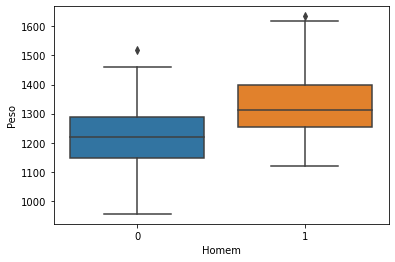

In [9]:
ax = sns.boxplot(x="Homem", y="Peso", data=df)

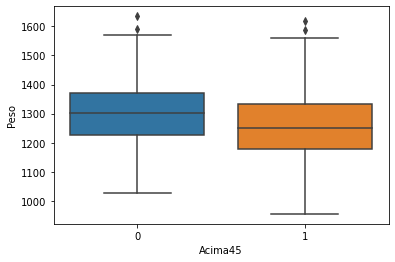

In [10]:
ax = sns.boxplot(x="Acima45", y="Peso", data=df)

# Iniciando a resolução do Exercício 1

In [11]:
# Calcula as variáveis centradas
df['Tamanho_Centrado'] = df.Tamanho-np.mean(df.Tamanho)
df['Peso_Centrado'] = df.Peso-np.mean(df.Peso)
df.head()

,Homem,Acima45,Tamanho,Peso,Desc_Homem,Desc_Idade,Homem_Acima45_Concat,Tamanho_Centrado,Peso_Centrado
0,1,0,4512,1530,Homem,Abaixo de 45,Homem e Abaixo de 45,878.008439,247.126582
1,1,0,3738,1297,Homem,Abaixo de 45,Homem e Abaixo de 45,104.008439,14.126582
2,1,0,4261,1335,Homem,Abaixo de 45,Homem e Abaixo de 45,627.008439,52.126582
3,1,0,3777,1282,Homem,Abaixo de 45,Homem e Abaixo de 45,143.008439,-0.873418
4,1,0,4177,1590,Homem,Abaixo de 45,Homem e Abaixo de 45,543.008439,307.126582


***1) Há diferença no peso cerebral entre os <span style="color:red"> sexos </span>?***

In [12]:
# H0 --> μ1 = μ2
# Ha --> μ1 ≠ μ2
# Criando uma base com quem é 1 ou 0
Homens_Classe_1 = df[df['Homem'] == 1]
Homens_Classe_0 = df[df['Homem'] == 0]

# Testando primeiro a igualdade de variancias
print("P-valor do teste de levene: ",round(stats.levene(Homens_Classe_1['Peso'],Homens_Classe_0['Peso'])[1],3))
# H0 --> Igualdade de variâncias
# Ao avaliar o p-valor, não rejeitamos H0

# Teste t de Student 
print("P-valor do teste de T: ",round(stats.ttest_ind(Homens_Classe_1['Peso'],Homens_Classe_0['Peso'])[1],3))

#Ao considerar alpha=0.05 a Hipótese Nula H0 (igualdade de médias) pode ser rejeitada pois o valor p é menor que alpha

print("\nConclusão: Não existe igualdade de peso considerando a variável Homem")


P-valor do teste de levene:  0.767
P-valor do teste de T:  0.0

Conclusão: Não existe igualdade de peso considerando a variável Homem


***1) Há diferença no peso cerebral entre os <span style="color:red"> grupos etários </span>?***

In [13]:
# H0 --> μ1 = μ2
# Ha --> μ1 ≠ μ2
# Criando uma base com quem é 1 ou 0
Acima45_Classe_1 = df[df['Acima45'] == 1]
Acima45_Classe_0 = df[df['Acima45'] == 0]

# Testando primeiro a igualdade de variancias
print("P-valor do teste de levene: ",round(stats.levene(Acima45_Classe_1['Peso'],Acima45_Classe_0['Peso'])[1],3))
# H0 --> Igualdade de variâncias
# Ao avaliar o p-valor, não rejeitamos H0

# Teste t de Student 
print("P-valor do teste de T: ",round(stats.ttest_ind(Acima45_Classe_1['Peso'],Acima45_Classe_0['Peso'])[1],3))

# Ao considerar alpha=0.05 a Hipótese Nula H0 (igualdade de médias) pode ser rejeitada pois o valor p é menor que alpha

### Conclusão: Não existe igualdade de peso considerando a variável Acima45
print("\nConclusão: Não existe igualdade de peso considerando a variável Acima45")


P-valor do teste de levene:  0.692
P-valor do teste de T:  0.009

Conclusão: Não existe igualdade de peso considerando a variável Acima45


# Iniciando a resolução do Exercício 2

***2) O tamanho da cabeça é preditor do peso cerebral e, neste caso, há diferença nessa relação entre os sexos e entre os grupos etários?***

In [14]:
# Ajustando o modelo
mod = ols('df.Peso ~ df.Tamanho_Centrado * df.Homem + df.Tamanho_Centrado*df.Acima45',data=df)
res = mod.fit()
print(res.summary())
variables = res.model.exog
print([variance_inflation_factor(variables, i) for i in range(variables.shape[1])])

                            OLS Regression Results                            
Dep. Variable:                df.Peso   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     88.22
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           1.36e-51
Time:                        12:34:43   Log-Likelihood:                -1344.5
No. Observations:                 237   AIC:                             2701.
Df Residuals:                     231   BIC:                             2722.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [15]:
# Como uma das interações não deu significativa, estou retirando uma delas (visto que ambas possuem o mesmo p-valor) 
# e deixando Homem sem a interação com o tamanho_centrado
mod = ols('df.Peso ~ df.Tamanho_Centrado + df.Homem+ df.Tamanho_Centrado*df.Acima45',data=df)
res = mod.fit()
print(res.summary())
variables = res.model.exog
print([variance_inflation_factor(variables, i) for i in range(variables.shape[1])])

                            OLS Regression Results                            
Dep. Variable:                df.Peso   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     110.0
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           2.05e-52
Time:                        12:34:49   Log-Likelihood:                -1345.1
No. Observations:                 237   AIC:                             2700.
Df Residuals:                     232   BIC:                             2717.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [17]:
# Como o maior p-valor foi da interação entre Tamanho centrado e Acima45, estou retirando a interação e deixando a 
# variável Acima45
mod = ols('df.Peso ~ df.Tamanho_Centrado + df.Homem+ df.Acima45',data=df)
res = mod.fit()
print(res.summary())
variables = res.model.exog
print([variance_inflation_factor(variables, i) for i in range(variables.shape[1])])

                            OLS Regression Results                            
Dep. Variable:                df.Peso   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     146.0
Date:                Thu, 04 Jun 2020   Prob (F-statistic):           2.94e-53
Time:                        12:36:16   Log-Likelihood:                -1345.7
No. Observations:                 237   AIC:                             2699.
Df Residuals:                     233   BIC:                             2713.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1282.9713    

**<span style="color:red"> Conclusão:** </span> Dado que as variáveis Homem e Acima45 são significativas no modelo, sua adição aumentou o R2, não temos problemas de multicolinearidade e considerando um nível de significância de 0.05 são aceitas no modelo, conclui-se que elas são importantes para uma melhor predição do Peso e que há diferença nessa na relação dessas variáveis para predição do peso cerebral.

In [18]:
# Curiosidade minha. Quis apenas relembrar algo que lembrei ter visto na faculdade e testar se as medias dos 4 possíveis grupos eram iguais ou não
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df.Peso, df.Homem_Acima45_Concat))

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
        group1                group2         meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------------------------
 Homem e Abaixo de 45   Homem e Acima de 45  -57.9806 0.0087 -105.0185  -10.9428   True
 Homem e Abaixo de 45 Mulher e Abaixo de 45 -125.4396  0.001 -176.8083  -74.0709   True
 Homem e Abaixo de 45  Mulher e Acima de 45 -167.8554  0.001 -220.0166 -115.6943   True
  Homem e Acima de 45 Mulher e Abaixo de 45   -67.459 0.0019  -115.506   -19.412   True
  Homem e Acima de 45  Mulher e Acima de 45 -109.8748  0.001 -158.7681  -60.9815   True
Mulher e Abaixo de 45  Mulher e Acima de 45  -42.4158 0.1668  -95.4888   10.6571  False
---------------------------------------------------------------------------------------


# Iniciando a resolução do Exercício 3

***3) Estime o peso médio do cérebro de homens e de mulheres (pontual e intervalar).***

In [19]:
# Para este exercício considerarei um 90% de confiança

In [20]:
Base_Homens = df[df['Homem'] == 1]
Base_Mulheres = df[df['Homem'] == 0]
Base_Homens.head(5)

,Homem,Acima45,Tamanho,Peso,Desc_Homem,Desc_Idade,Homem_Acima45_Concat,Tamanho_Centrado,Peso_Centrado
0,1,0,4512,1530,Homem,Abaixo de 45,Homem e Abaixo de 45,878.008439,247.126582
1,1,0,3738,1297,Homem,Abaixo de 45,Homem e Abaixo de 45,104.008439,14.126582
2,1,0,4261,1335,Homem,Abaixo de 45,Homem e Abaixo de 45,627.008439,52.126582
3,1,0,3777,1282,Homem,Abaixo de 45,Homem e Abaixo de 45,143.008439,-0.873418
4,1,0,4177,1590,Homem,Abaixo de 45,Homem e Abaixo de 45,543.008439,307.126582


In [21]:
Base_Mulheres.head(5)

,Homem,Acima45,Tamanho,Peso,Desc_Homem,Desc_Idade,Homem_Acima45_Concat,Tamanho_Centrado,Peso_Centrado
134,0,0,2857,1027,Mulher,Abaixo de 45,Mulher e Abaixo de 45,-776.991561,-255.873418
135,0,0,3436,1235,Mulher,Abaixo de 45,Mulher e Abaixo de 45,-197.991561,-47.873418
136,0,0,3791,1260,Mulher,Abaixo de 45,Mulher e Abaixo de 45,157.008439,-22.873418
137,0,0,3302,1165,Mulher,Abaixo de 45,Mulher e Abaixo de 45,-331.991561,-117.873418
138,0,0,3104,1080,Mulher,Abaixo de 45,Mulher e Abaixo de 45,-529.991561,-202.873418


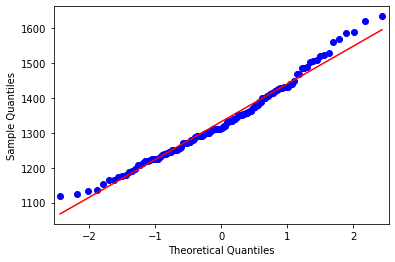

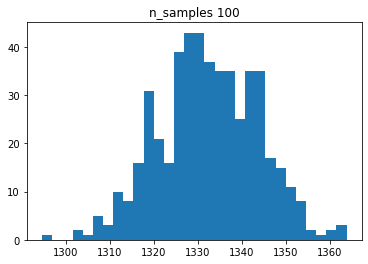

Pvalor do teste de normalidade shapiro:  0.029
Conclusão: Considerando um nível de significância de 0.01, a distribuição é normal


In [22]:
# QQ Plot
qqplot(Base_Homens.Peso, line='s')
pyplot.show()

# Será que o número de amostras é o bastante para aproximar a distribuição da média amostral da Normal?
# Aqui faremos um teste gerando amostras bootstrap para ver se converge para uma normal
for n_samples in [100]:
    valor = Base_Homens[['Peso']]
    medias = []
    for _ in range(500):
        amostras = Base_Homens.sample(n_samples,replace=True)['Peso']
        medias.append(amostras.mean())
    plt.hist(medias, bins = 30)
    plt.title('n_samples %d' % n_samples)
    plt.show()

p_valor=round(stats.shapiro(Base_Homens.Peso)[1],3)
print("Pvalor do teste de normalidade shapiro: ",p_valor)
print("Conclusão: Considerando um nível de significância de 0.01, a distribuição é normal")

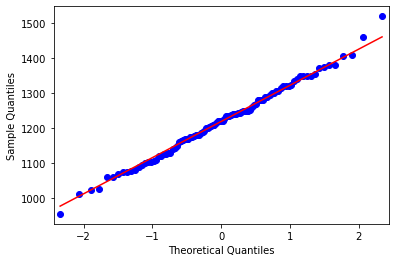

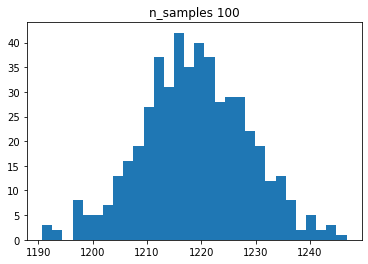

Pvalor do teste de normalidade shapiro:  0.992
Conclusão: Considerando um nível de significância de 0.01, a distribuição é normal


In [23]:
# QQ Plot
qqplot(Base_Mulheres.Peso, line='s')
pyplot.show()

# Será que o número de amostras é o bastante para aproximar a distribuição da média amostral da Normal?
# Aqui faremos um teste gerando amostras bootstrap para ver se converge para uma normal
for n_samples in [100]:
    valor = Base_Mulheres[['Peso']]
    medias = []
    for _ in range(500):
        amostras = Base_Mulheres.sample(n_samples,replace=True)['Peso']
        medias.append(amostras.mean())
    plt.hist(medias, bins = 30)
    plt.title('n_samples %d' % n_samples)
    plt.show()
    
p_valor=round(stats.shapiro(Base_Mulheres.Peso)[1],3)
print("Pvalor do teste de normalidade shapiro: ",p_valor)
print("Conclusão: Considerando um nível de significância de 0.01, a distribuição é normal")

Melhor mu: 1331.5726290516207
Estimativa intervalar para o Peso dos Homens:  (1313.2447792718747, 1350.4716386385733)


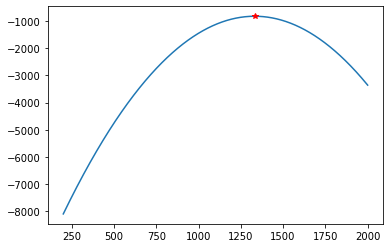

In [24]:
#Conhecendo a forma da função log-verossimilhança da amostra da distribuição Normal
# tomando os dados do peso dos homens, podemos fazer a estimativa da média:
def get_ll_normal(x, mu, sigma):
    return np.sum(np.log(stats.norm.pdf(x, mu, sigma)))

x = Base_Homens.Peso # iguala x a variável "Media" 
sigma = np.std(x) # # parâmetro fixo, igualado ao desvio padrão amostral
theta = np.linspace(200, 2000, 2500) # parâmetro que vamos variar (mu)
f_theta1 = np.array([get_ll_normal(x, mu, sigma) for mu in theta])

i_best = np.argmax(f_theta1) # cálculo (numérico) do estimador de máxima verossimilhança (EMV) de mu
print('Melhor mu:', theta[i_best])
print("Estimativa intervalar para o Peso dos Homens: ",sms.DescrStatsW(Base_Homens.Peso).tconfint_mean()) # IC para média de uma Normal (desvio padrão desconhecido)

plt.plot(theta, f_theta1)
plt.plot([theta[i_best]], [f_theta1[i_best]], 'r*') # coloca uma estrelinha no maior valor (EMV)



Melhor mu: 1219.2076830732294
Estimativa intervalar para o Peso das Mulheres:  (1198.8531509366069, 1239.4381111993155)


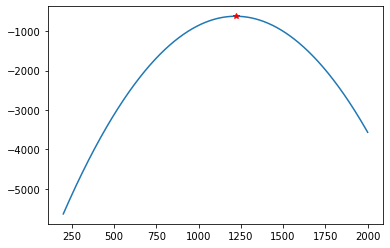

In [25]:
#Conhecendo a forma da função log-verossimilhança da amostra da distribuição Normal
# tomando os dados do peso das mulheres, podemos fazer a estimativa da média:
def get_ll_normal(x, mu, sigma):
    return np.sum(np.log(stats.norm.pdf(x, mu, sigma)))

x = Base_Mulheres.Peso #
sigma = np.std(x) 
theta = np.linspace(200, 2000, 2500)
f_theta1 = np.array([get_ll_normal(x, mu, sigma) for mu in theta])

i_best = np.argmax(f_theta1) 
print('Melhor mu:', theta[i_best])
print("Estimativa intervalar para o Peso das Mulheres: ",sms.DescrStatsW(Base_Mulheres.Peso).tconfint_mean()) # IC para média de uma Normal (desvio padrão desconhecido)

plt.plot(theta, f_theta1)
plt.plot([theta[i_best]], [f_theta1[i_best]], 'r*') 

**<span style="color:red"> Conclusão: </span> Após executar avaliar e constatar a normalidade dos dados, foi possível obter a estimatíva da média considerando máxima verossimilhança e a estimativa pontual para o valor do peso considerando Homens e Mulheres.**

**Para homens, temos que a média obtida pelo EMV é igual a 1331.5726290516207, com intervalo de (1313.2447792718747, 1350.4716386385733)**

**Para Mulheres, temos que a média obtida pelo EMV é igual a 1219.2076830732294, com intervalo de (1198.8531509366069, 1239.4381111993155)**